IMPLEMENTATION OF TOY PROBLEMS
# **EXP 1A : Camel Banana Problem**

In [ ]:
total_bananas = int(input("No. Of bananas at start : "))
distance = int(input("Distance to be covered  : "))
load_capacity = int(input("Maximum No. of bananas camel can carry at a time : "))

bananas_lost = 0
start = total_bananas
for i in range(distance) :
    while start > 0 :
        start = start-load_capacity
        if start == 1 :
            bananas_lost = bananas_lost-1
        bananas_lost = bananas_lost+2
    bananas_lost = bananas_lost-1
    start = total_bananas - bananas_lost
    if start == 0:
        break
print("Total bananas delivered : ", start )

No. Of bananas at start : 3000
Distance to be covered  : 1000
Maximum No. of bananas camel can carry at a time : 1000
Total bananas delivered :  533


# **EXP 1B : Water Jug Problem**

In [ ]:
def water_jug_problem(jug1_cap, jug2_cap, target_amount):
    # Initialize the jugs and the possible actions
    j1 = 0
    j2 = 0
    actions = [("fill", 1), ("fill", 2), ("empty", 1), ("empty", 2), ("pour", 1, 2), ("pour", 2, 1)]
    # Create an empty set to store visited states
    visited = set()
    # Create a queue to store states to visit
    queue = [(j1, j2, [])]
    while queue:
        # Dequeue the front state from the queue
        j1, j2, seq = queue.pop(0)
        # If this state has not been visited before, mark it as visited
        if (j1, j2) not in visited:
            visited.add((j1, j2))
            # If this state matches the target amount, return the sequence of actions taken to get to this state
            if j1 == target_amount:
                return seq
            # Generate all possible next states from this state
            for action in actions:
                if action[0] == "fill":
                    if action[1] == 1:
                        next_state = (jug1_cap, j2)
                    else:
                        next_state = (j1, jug2_cap)
                elif action[0] == "empty":
                    if action[1] == 1:
                        next_state = (0, j2)
                    else:
                        next_state = (j1, 0)
                else:
                    if action[1] == 1:
                        amount = min(j1, jug2_cap - j2)
                        next_state = (j1 - amount, j2 + amount)
                    else:
                        amount = min(j2, jug1_cap - j1)
                        next_state = (j1 + amount, j2 - amount)
                # Add the next state to the queue if it has not been visited before
                if next_state not in visited:
                    next_seq = seq + [action]
                    queue.append((next_state[0], next_state[1], next_seq))
    # If the queue becomes empty without finding a solution, return None
    return None

result = water_jug_problem(5, 3, 1)
print(result)


[('fill', 2), ('pour', 2, 1), ('fill', 2), ('pour', 2, 1), ('empty', 1), ('pour', 2, 1)]


# **EXP 2 : Tic Tac Toe**
developing an agent problem for real world prblems

In [ ]:
# Set up the game board as a list
board = ["-", "-", "-",
        "-", "-", "-",
        "-", "-", "-"]

# Define a function to print the game board
def print_board():
    print(board[0] + " | " + board[1] + " | " + board[2])
    print(board[3] + " | " + board[4] + " | " + board[5])
    print(board[6] + " | " + board[7] + " | " + board[8])

# Define a function to handle a player's turn
def take_turn(player):
    print(player + "'s turn.")
    position = input("Choose a position from 1-9: ")
    while position not in ["1", "2", "3", "4", "5", "6", "7", "8", "9"]:
        position = input("Invalid input. Choose a position from 1-9: ")
    position = int(position) - 1
    while board[position] != "-":
        position = int(input("Position already taken. Choose a different position: ")) - 1
    board[position] = player
    print_board()

# Define a function to check if the game is over
def check_game_over():
    # Check for a win
    if (board[0] == board[1] == board[2] != "-") or \
    (board[3] == board[4] == board[5] != "-") or \
    (board[6] == board[7] == board[8] != "-") or \
    (board[0] == board[3] == board[6] != "-") or \
    (board[1] == board[4] == board[7] != "-") or \
    (board[2] == board[5] == board[8] != "-") or \
    (board[0] == board[4] == board[8] != "-") or \
    (board[2] == board[4] == board[6] != "-"):
        return "win"
    # Check for a tie
    elif "-" not in board:
        return "tie"
    # Game is not over
    else:
        return "play"

# Define the main game loop
def play_game():
    print_board()
    current_player = "X"
    game_over = False
    while not game_over:
        take_turn(current_player)
        game_result = check_game_over()
        if game_result == "win":
            print(current_player + " wins!")
            game_over = True
        elif game_result == "tie":
            print("It's a tie!")
            game_over = True
        else:
            # Switch to the other player
            current_player = "O" if current_player == "X" else "X"

# Start the game
play_game()

- | - | -
- | - | -
- | - | -
X's turn.
Choose a position from 1-9: 1
X | - | -
- | - | -
- | - | -
O's turn.
Choose a position from 1-9: 3
X | - | O
- | - | -
- | - | -
X's turn.
Choose a position from 1-9: 5
X | - | O
- | X | -
- | - | -
O's turn.
Choose a position from 1-9: 6
X | - | O
- | X | O
- | - | -
X's turn.
Choose a position from 1-9: 9
X | - | O
- | X | O
- | - | X
X wins!


# **EXP 3 : CryptArthimetic Problem**
constraint satisfaction problem

In [ ]:
import itertools

def get_value(word, substitution):
    s = 0
    factor = 1
    for letter in reversed(word):
        s += factor * substitution[letter]
        factor *= 10
    return s

def solve2(equation):
    left, right = equation.lower().replace(' ', '').split('=')
    left = left.split('+')
    letters = set(right)
    for word in left:
        for letter in word:
            letters.add(letter)
    letters = list(letters)

    digits = range(10)
    for perm in itertools.permutations(digits, len(letters)):
        sol = dict(zip(letters, perm))

        if sum(get_value(word, sol) for word in left) == get_value(right, sol):
            print(' + '.join(str(get_value(word, sol)) for word in left) + " = {} (mapping: {})".format(get_value(right, sol), sol))


In [ ]:

#solve2('SEND + MORE = MONEY')
#solve2('POINT + ZERO = ENERGY ')
solve2('EAT + THAT = APPLE')

819 + 9219 = 10038 (mapping: {'h': 2, 't': 9, 'p': 0, 'e': 8, 'l': 3, 'a': 1})


#  **Exp 4** **:** **Implementation and Analysis of BFS And DFS for Same Application**

In [ ]:
from collections import deque
# Example usage:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F', 'G'],
    'D': ['B'],
    'E': ['B', 'H'],
    'F': ['C'],
    'G': ['C'],
    'H': ['E']
}

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node, end=' ')
            visited.add(node)
            queue.extend(neighbor for neighbor in graph[node] if neighbor not in visited)

def dfs(graph, node, visited):
    if node not in visited:
        print(node, end=' ')
        visited.add(node)
        for neighbor in graph[node]:
            dfs(graph, neighbor, visited)
start_node = 'A'
visited_nodes = set()
print("DFS : ")
dfs(graph, start_node, visited_nodes)
print('\n')
print("BFS : ")
start_node = 'A'
bfs(graph, start_node)

DFS : 
A B D E H C F G 

BFS : 
A B C D E F G H 

# **EXP 5**


**BEST FIRST SEARCH**

In [ ]:
from queue import PriorityQueue

class Graph:
    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def get_neighbors(self, v):
        return self.adjacency_list[v]

    def h(self, n, goal):
        # Heuristic function: returns the estimated cost from node 'n' to the goal
        H = {'A': 3, 'B': 2, 'C': 1, 'D': 0}  # Example heuristic values for nodes
        return H.get(n, float('inf'))

    def best_first_search(self, start, goal):
        explored = set()
        pq = PriorityQueue()
        pq.put((self.h(start, goal), [start]))  # Include the path to the current node

        while not pq.empty():
            _, path = pq.get()
            current = path[-1]  # Get the last node in the path

            if current == goal:
                return path  # Goal found

            explored.add(current)

            for neighbor, _ in self.get_neighbors(current):
                if neighbor not in explored:
                    pq.put((self.h(neighbor, goal), path + [neighbor]))  # Include neighbor in the path

        return None  # Goal not found

# Example usage:
adjacency_list = {'A': [('B', 1), ('C', 2)], 'B': [('D', 3)], 'C': [('D', 2)], 'D': []}
graph = Graph(adjacency_list)
start_node, goal_node = 'A', 'D'
path = graph.best_first_search(start_node, goal_node)
if path:
    print("Path found:", path)
else:
    print("No path exists from", start_node, "to", goal_node)



Path found: ['A', 'C', 'D']


A*

In [ ]:



class Graph:
    def __init__(self, adjacency_list):
        self.adjacency_list = adjacency_list

    def get_neighbors(self, v):
        return self.adjacency_list[v]

    def h(self, n):
        H = {'A': 1, 'B': 1, 'C': 1, 'D': 1}
        return H.get(n, float('inf'))

    def a_star_algorithm(self, start, goal):
        open_list, closed_list, g, parents = {start}, set(), {start: 0}, {start: start}

        while open_list:
            n = min(open_list, key=lambda x: g[x] + self.h(x))
            if n == goal:
                path = []
                while n != start:
                    path.append(n)
                    n = parents[n]
                path.append(start)
                return path[::-1]
            for m, weight in self.get_neighbors(n):
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight
                elif m in open_list and g[m] > g[n] + weight:
                    g[m], parents[m] = g[n] + weight, n
            open_list.remove(n)
            closed_list.add(n)
        return None

# Example usage:
adjacency_list = {'A': [('B', 1), ('C', 3), ('D', 7)], 'B': [('D', 5)], 'C': [('D', 12)]}
graph1 = Graph(adjacency_list)
print("A* path:", graph1.a_star_algorithm('A', 'D'))


A* path: ['A', 'B', 'D']


# **EXP 6 : Fuzzy

In [ ]:
# Define fuzzy sets A and B
A = {"a": 0.2, "b": 0.3, "c": 0.6, "d": 0.6}
B = {"a": 0.9, "b": 0.9, "c": 0.4, "d": 0.5}

# Print fuzzy sets A and B with labels and explanations
print('First Fuzzy Set (A):')
print('A is a fuzzy set representing certain elements with varying degrees of membership.')
print('For each element in A, the membership value indicates the degree of membership.')
for key, value in A.items():
    print(f"{key}: {value}")

print('\nSecond Fuzzy Set (B):')
print('B is another fuzzy set representing certain elements with varying degrees of membership.')
print('For each element in B, the membership value indicates the degree of membership.')
for key, value in B.items():
    print(f"{key}: {value}")

# Initialize fuzzy set for union
union_set = {}

# Perform fuzzy set union
for key in A.keys() | B.keys():
    union_set[key] = max(A.get(key, 0), B.get(key, 0))

# Print fuzzy set union with label and explanation
print('\nFuzzy Set Union (Y):')
print('The union of fuzzy sets A and B results in a new fuzzy set Y.')
print('For each element in Y, the membership value is the maximum of the membership values in A and B.')
for key, value in union_set.items():
    print(f"{key}: {value}")


First Fuzzy Set (A):
A is a fuzzy set representing certain elements with varying degrees of membership.
For each element in A, the membership value indicates the degree of membership.
a: 0.2
b: 0.3
c: 0.6
d: 0.6

Second Fuzzy Set (B):
B is another fuzzy set representing certain elements with varying degrees of membership.
For each element in B, the membership value indicates the degree of membership.
a: 0.9
b: 0.9
c: 0.4
d: 0.5

Fuzzy Set Union (Y):
The union of fuzzy sets A and B results in a new fuzzy set Y.
For each element in Y, the membership value is the maximum of the membership values in A and B.
d: 0.6
c: 0.6
b: 0.9
a: 0.9


# Dempster Shafer

In [ ]:
def combine_beliefs(beliefs):
    # Combine beliefs using Dempster's rule of combination
    combined_belief = {}
    for subset in beliefs.keys():
        combined_belief[subset] = 1
        for other_subset in beliefs.keys():
            if subset != other_subset:
                combined_belief[subset] *= (1 - beliefs[other_subset])
    normalization_factor = sum(combined_belief.values())
    for subset in combined_belief.keys():
        combined_belief[subset] /= normalization_factor
    return combined_belief

# Example: combining beliefs from two sources
beliefs1 = {"A": 0.2, "B": 0.4, "C": 0.1}
beliefs2 = {"B": 0.3, "C": 0.2, "D": 0.5}

combined_belief = combine_beliefs(beliefs1)
print("Combined belief from source 1:", combined_belief)

combined_belief = combine_beliefs(beliefs2)
print("Combined belief from source 2:", combined_belief)


Combined belief from source 1: {'A': 0.3103448275862069, 'B': 0.41379310344827586, 'C': 0.2758620689655172}
Combined belief from source 2: {'B': 0.3053435114503817, 'C': 0.2671755725190839, 'D': 0.4274809160305343}


# **EXP 7 : Implementation of unification and resolution for real world problems.**

In [ ]:
def unify(statement1, statement2):
    # Split statements into words
    words1 = statement1.split()
    words2 = statement2.split()

    # Initialize an empty substitution dictionary
    substitution = {}

    # Iterate over the words in both statements
    for word1, word2 in zip(words1, words2):
        # If a word in statement 2 is a variable, assign its value based on statement 1
        if word2.isalpha() and word2[0].isupper():
            substitution[word2] = word1
        # If words don't match and neither is a variable, unification is not possible
        elif word1 != word2:
            return None

    # Return the substitution dictionary
    return substitution

# Given statements
statement1 = "Moksha and Vineela are sisters"
statement2 = "X and Y are sisters"

# Unify statement 2 with statement 1
result = unify(statement1, statement2)

# Print the result
if result:
    print("The unification is successful. Substitution =", result)
else:
    print("Unification failed.")

The unification is successful. Substitution = {'X': 'Moksha', 'Y': 'Vineela'}


# Resolution

In [ ]:
class Parameter:
    variable_count = 1

    def __init__(self, name=None):
        self.name = name or f"v{Parameter.variable_count}"
        Parameter.variable_count += 1

    def unify(self, type_, name):
        self.type = type_
        self.name = name

class Predicate:
    def __init__(self, name, params):
        self.name, self.params = name, params

class Sentence:
    def __init__(self, string):
        self.predicates = [Predicate(name, [Parameter(p) if p[0].isupper() else p for p in params.split(",")])
                           for name, params in [predicate.split("(") for predicate in string.split("|")]]

    def containsVariable(self):
        return any(not param.isConstant() for pred in self.predicates for param in pred.params)

class KB:
    def __init__(self, inputSentences):
        self.sentences = [Sentence(s) for s in inputSentences]

    def askQueries(self, queryList):
        results = []
        for query in queryList:
            result = "TRUE" if any(self.resolve([Sentence(f"~{query}")], [False]*(len(self.sentences)+1)) for _ in range(40)) else "FALSE"
            results.append(f"{query}: {result}")
        return results

    def resolve(self, queryStack, visited):
        if queryStack:
            query = queryStack.pop()
            queryPredicate = query.predicates[0]
            for kb_sentence in self.sentences:
                if not visited[self.sentences.index(kb_sentence)]:
                    for kbPredicate in kb_sentence.predicates:
                        if kbPredicate.name == queryPredicate.name:
                            if all(self.resolve([Sentence(f"~{q}") for q in query.predicates]+[kb_sentence], visited) for q in kbPredicate.params+queryPredicate.params):
                                print(f"Resolved {queryPredicate.name} with {kbPredicate.name} in sentence: {kb_sentence}")
                                return True
        return True

# Example usage
inputSentences = [
    "sister(Moksha,Vineela)",
    "brother(Vineela,Raghav)",
    "sister(Vineela,Moksha)"
]
inputQueries = ["sister(Vineela,Moksha)", "sister(Vineela,Moksha)"]
kb = KB(inputSentences)
results = kb.askQueries(inputQueries)
for result in results:
    print(result)




sister(Vineela,Moksha): TRUE
sister(Vineela,Moksha): TRUE


In [ ]:
def resolution(sentence1, sentence2):
    clauses = sentence1 + sentence2  # Combine the clauses of both sentences
    for clause in clauses:
        negated_clause = negate_clause(clause)  # Negate each clause
        if negated_clause in clauses:  # Check if the negation is already in the combined set
            resolution_clause = f"({clause}, {negated_clause})"
            return True, resolution_clause  # If so, resolution succeeds
    return False, ""  # If no resolution is found, return False


def negate_clause(clause):
    # Simple negation function, assuming negation is denoted by prepending '~' to the clause
    return '~' + clause


# Example sentences
sentence1 = ['p', 'q', 'r']  # Example clause 1
sentence2 = ['~q', 's']       # Example clause 2

# Perform resolution
resolution_result, resolution_clause = resolution(sentence1, sentence2)

# Print result
if resolution_result:
    print("Resolution successful. Resolved clauses:", resolution_clause)
else:
    print("Resolution failed.")


Resolution successful. Resolved clauses: (q, ~q)


# **EXP 8 : Unsupervised Learning Methods**

- k means clustering
- k nearest neighbors

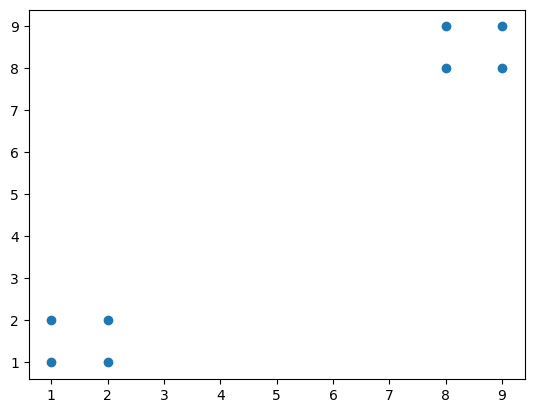

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

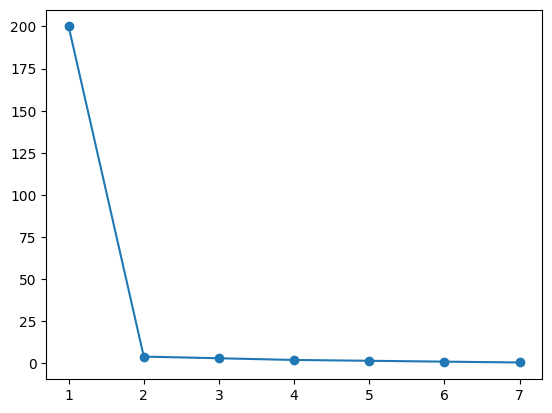

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


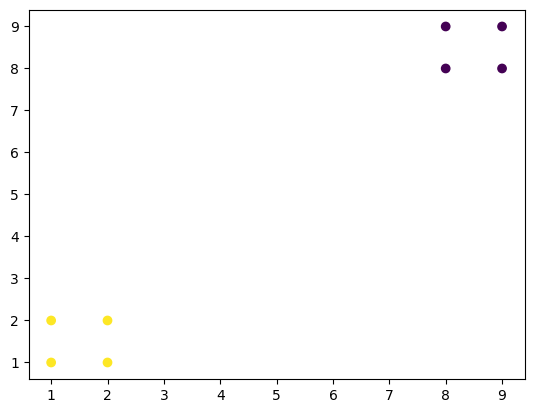

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


x = [1,2,2,1,8,9,8,9]
y = [1,2,1,2,8,9,9,8]

plt.scatter(x,y)
plt.show()


data = list(zip(x,y))
inertias = []

for i in range(1,8):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,8),inertias,marker="o")
plt.show()


kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
plt.scatter(x,y,c=kmeans.labels_)
plt.show()




**KNN**

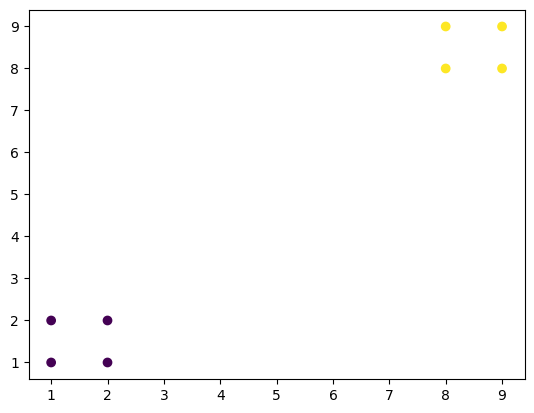

[1]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier



x = [1,2,2,1,8,9,8,9]
y = [1,2,1,2,8,9,9,8]
classes = [0,0,0,0,1,1,1,1]
plt.scatter(x,y,c=classes)
plt.show()

data = list(zip(x,y))
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(data,classes)

new_x = 8.5
new_y = 8.5

new_point = [(new_x,new_y)]
prediction = knn.predict(new_point)
print(prediction)



# SVM

In [1]:
import numpy as np

# Step 1: Prepare Your Data
# Create a simple dataset with two features and two classes
# Replace this with your own dataset
X_data = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6],
                   [6, 7], [7, 8], [8, 9], [9, 10], [10, 11]])
y_data = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # Binary classification labels

# Step 2: Split Your Dataset
# Use train_test_split to split your dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Step 3: Scale Your Features
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize and Train Your SVM Model
# Initialize the SVM classifier and train it on the training data
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Step 5: Evaluate Your Model
# Make predictions on the testing set and calculate accuracy
from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


Log

In [2]:
import numpy as np

# Step 1: Prepare Your Data
# Create a simple dataset with two features and two classes
# Replace this with your own dataset
X_data = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6],
                   [6, 7], [7, 8], [8, 9], [9, 10], [10, 11]])
y_data = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # Binary classification labels

# Step 2: Split Your Dataset
# Use train_test_split to split your dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Step 3: Scale Your Features
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Initialize and Train Your Logistic Regression Model
# Initialize the logistic regression classifier and train it on the training data
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Step 5: Evaluate Your Model
# Make predictions on the testing set and calculate accuracy
from sklearn.metrics import accuracy_score
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


# 9. NLP

In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Sample text for analysis
text = "I really enjoyed this movie. The acting was great and the plot was engaging."

# Calculate the sentiment score for the text
score = sia.polarity_scores(text)

# Print the sentiment score
print("negative = ", score["neg"])
print("neutral = ", score["neu"])
print("positive = ", score["pos"])
print("compound = ", score["compound"])


negative =  0.0
neutral =  0.498
positive =  0.502
compound =  0.8777


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Deep Learning

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D array
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons for classification
])

# Compile the model
model.compile(optimizer='adam',  # Use Adam optimizer
              loss='sparse_categorical_crossentropy',  # Use crossentropy loss
              metrics=['accuracy'])  # Monitor accuracy during training

# Train the model
model.fit(train_images, train_labels, epochs=5)  # Train for 5 epochs

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)  # Evaluate on test data
print('Test accuracy:', test_acc)  # Print test accuracy


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2579 - accuracy: 0.9271
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1146 - accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0781 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0588 - accuracy: 0.9816
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0692 - accuracy: 0.9779
Test accuracy: 0.9779000282287598


**GRAPH COLOURING**

In [ ]:
V = 4

def print_solution(color):
    print("Solution Exists: Following are the assigned colors")
    print(" ".join(map(str, color)))

def is_safe(v, graph, color, c):
    # Check if the color 'c' is safe for the vertex 'v'
    for i in range(V):
        if graph[v][i] and c == color[i]:
            return False
    return True

def graph_coloring_util(graph, m, color, v):
    # Base case: If all vertices are assigned a color, return true
    if v == V:
        return True

    # Try different colors for the current vertex 'v'
    for c in range(1, m + 1):
        # Check if assignment of color 'c' to 'v' is fine
        if is_safe(v, graph, color, c):
            color[v] = c

            # Recur to assign colors to the rest of the vertices
            if graph_coloring_util(graph, m, color, v + 1):
                return True

            # If assigning color 'c' doesn't lead to a solution, remove it
            color[v] = 0

    # If no color can be assigned to this vertex, return false
    return False

def graph_coloring(graph, m):
    color = [0] * V

    # Call graph_coloring_util() for vertex 0
    if not graph_coloring_util(graph, m, color, 0):
        print("Solution does not exist")
        return False

    print_solution(color)
    return True

# Driver code
if __name__ == "__main__":
    graph = [
        [0, 1, 1, 1],
        [1, 0, 1, 0],
        [1, 1, 0, 1],
        [1, 0, 1, 0],
    ]

    m = 3
    graph_coloring(graph, m)

Solution Exists: Following are the assigned colors
1 2 3 2
